# Visulization: IBM HR Analytics Employee Attrition

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
pd.options.display.max_columns = None

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('after_refine.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

## Correlation

Look for some high correlation between data


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/506px-Correlation_examples2.svg.png">

In statistics, the Pearson correlation coefficient (PCC, pronounced /ˈpɪərsən/), also referred to as Pearson's r, the Pearson product-moment correlation coefficient (PPMCC) or the bivariate correlation,[1] is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. 

In [3]:
df2 = df.copy()

df2.Attrition = df.Attrition.astype("category").cat.codes
df2.Gender = df.Gender.astype("category").cat.codes
df2.OverTime = df.OverTime.astype("category").cat.codes
df2.JobRole = df.JobRole.astype("category").cat.codes
df2.Department = df.Department.astype("category").cat.codes
df2.BusinessTravel = df.BusinessTravel.astype("category").cat.codes
df2.EducationField = df.EducationField.astype("category").cat.codes
df2.MaritalStatus = df.MaritalStatus.astype("category").cat.codes

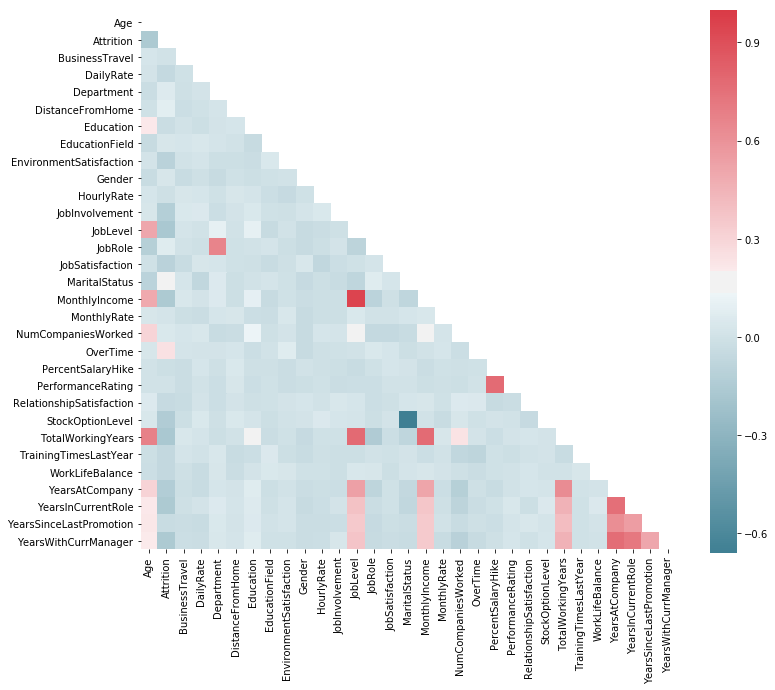

In [4]:
f, ax = plt.subplots(figsize=(12, 10))
corr = df2.corr()

#Clear upper part
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);
##Base on this graph, we could probably create new features! Combine some of them with high correlation.

### MonthlyIncome and JobLevel

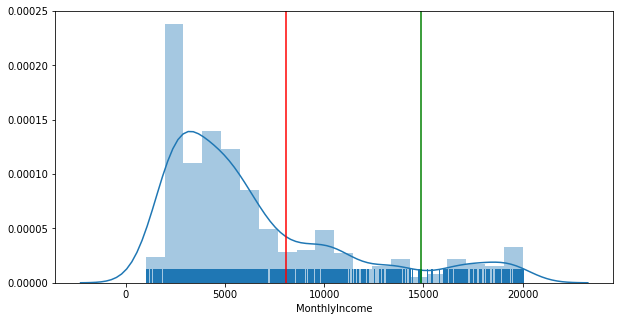

In [5]:
plt.figure(figsize=(10,5))
sns.distplot( a=df.MonthlyIncome, hist=True, kde=True, rug=True );
#Let"s draw few lines, possibly we could create 3 categories.
plt.axvline(x=8100, color='r')
plt.axvline(x=14900, color='g');

High correlation between this two variables. JobLevel vary form 1 to 5. Salary range from 2094 to 26999.

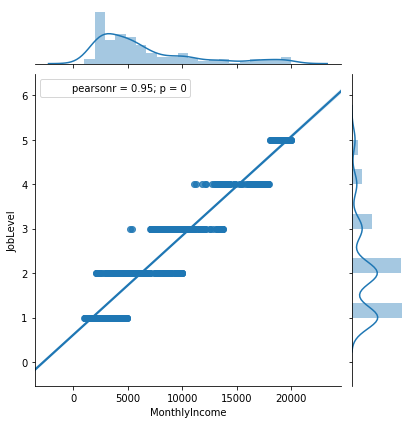

In [6]:
sns.jointplot(x=df.MonthlyIncome, y=df.JobLevel, kind='reg');

Looks like dividing them into 3 categories won't change much 

### JobRole vs Department

JobRole is highly dependent on department! But there is no real correlation between them!

Let's drop department

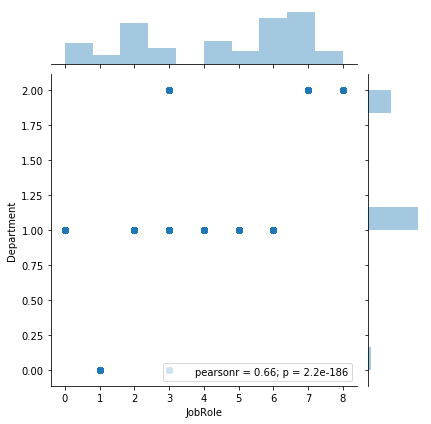

In [7]:
sns.jointplot(x=df2.JobRole, y=df2.Department, kind='scatter');

### JobLevel vs TotalWorkingYears

Lets keep it

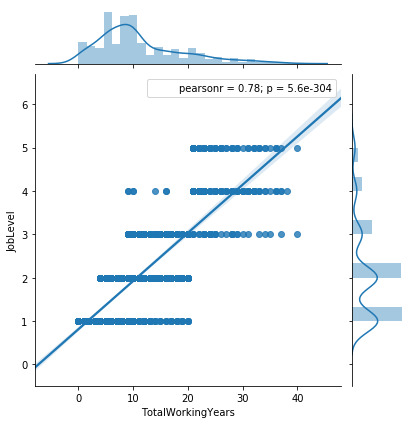

In [8]:
sns.jointplot(x=df.TotalWorkingYears, y=df.JobLevel, kind='reg');

In [9]:
df.drop(['MonthlyIncome', 'Department'], axis=1, inplace=True)

### Data Distribution

A 2D density plot  or  2D histogram is an extension of the well known histogram. It shows the distribution of values in a data set across the range of two quantitative variables. It is really useful to avoid over plotting in a scatterplot. If you have too many dots, the 2D density plot counts the number of observations within a particular area of the 2D space. This specific area can be a square or a hexagon (hexbin). You can also estimate a 2D kernel density estimation and represent it with contours.

0.4132863018563338

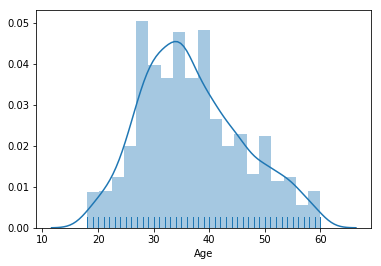

In [10]:
sns.distplot( a=df.Age, hist=True, kde=True, rug=True );
df.Age.skew()

## Goal

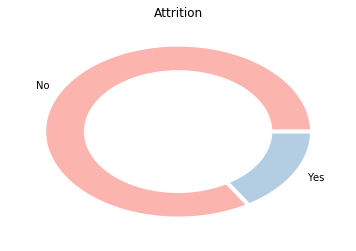

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


In [11]:
## Quite big disproportion !!!

from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(df.Attrition.value_counts(normalize=True), 
        labels=['No','Yes'], 
        wedgeprops = { 'linewidth' : 4, 'edgecolor' : 'white' },
        colors=Pastel1_7.hex_colors,
       )
p=plt.gcf()

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.title('Attrition')
p.gca().add_artist(my_circle)
plt.show()

print(df.Attrition.value_counts(normalize=True))

### Marginal plot
A marginal plot allows to study the relationship between 2 numeric variables. The central chart display their correlation. It is usually a scatterplot, a hexbin plot, a 2D histogram or a 2D density plot. The marginal charts, usually at the top and at the right, show the distribution of the 2 variables using histogram or density plot.
https://python-graph-gallery.com/82-marginal-plot-with-seaborn/

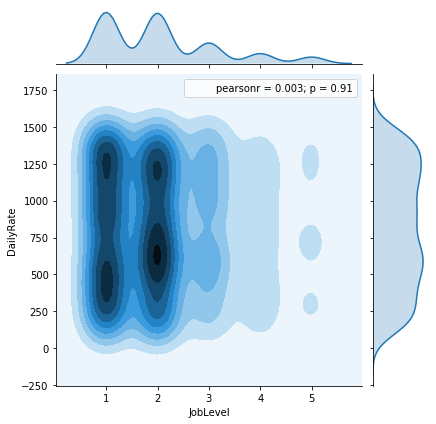

In [12]:
sns.jointplot(x=df.JobLevel, y=df.DailyRate, kind='kde');

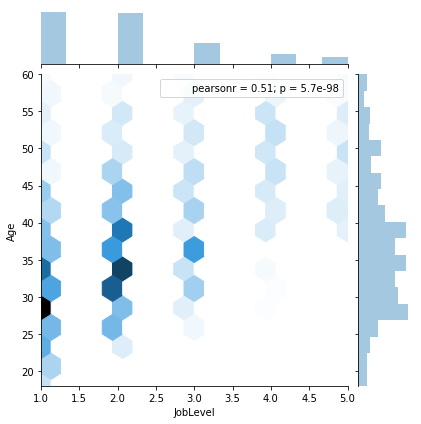

In [13]:
sns.jointplot(x=df.JobLevel, y=df.Age, kind='hex'); # kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }

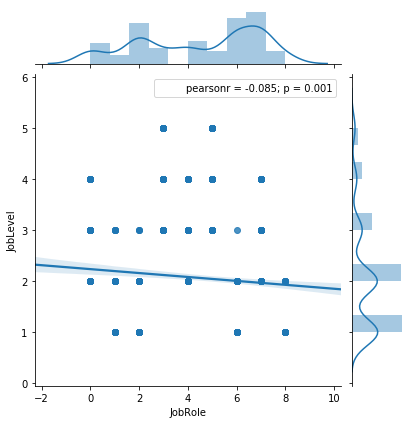

In [14]:
sns.jointplot(x=df2.JobRole, y=df.JobLevel, kind='reg');

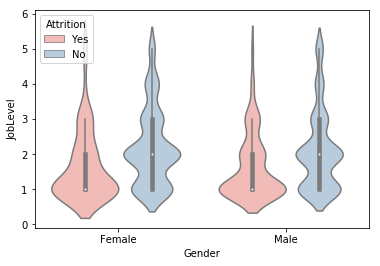

In [15]:
sns.violinplot(x=df.Gender, y=df.JobLevel, hue=df.Attrition,palette="Pastel1");

#### Age by Attrition

Text(0.5,0,'Age')

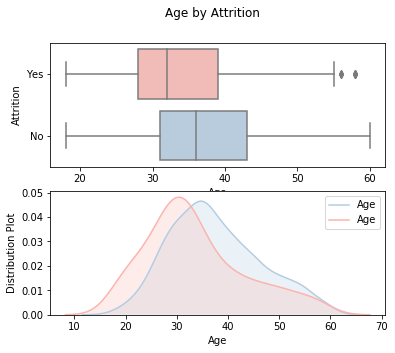

In [16]:
plt.figure(figsize=(6,5))
plt.suptitle('Age'+ ' by ' + 'Attrition')

plt.subplot(2,1,1)
sns.boxplot(y=df['Attrition'], x=df['Age'], orient="h", palette='Pastel1');


plt.subplot(2,1,2)
s1 = df[df['Attrition'] == 'No']
sns.kdeplot(s1.Age, shade=True, color = "#b3cde3");
sns.kdeplot(df.drop(s1.index).Age, shade=True, color = '#fbb4ae');
plt.ylabel("Distribution Plot")
plt.xlabel('Age')

In [17]:
# Clear mose memory
df2 = None

## https://python-graph-gallery.com/184-lollipop-plot-with-2-groups/

### T-SNE

#### Get dummies

In [18]:
df.Attrition = df.Attrition.astype("category").cat.codes
df.Gender = df.Gender.astype("category").cat.codes
df.OverTime = df.OverTime.astype("category").cat.codes

businessTrav = pd.get_dummies(df.BusinessTravel)
educationF = pd.get_dummies(df.EducationField)
jobR = pd.get_dummies(df.JobRole)
maritalS = pd.get_dummies(df.MaritalStatus)
df = pd.concat([df, businessTrav, educationF, jobR, maritalS], axis=1)
df.drop(['BusinessTravel', 'EducationField', 'JobRole', 'MaritalStatus'], inplace=True, axis=1)

df.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2       0          94               3         2   
1                        3       1          61               2         2   
2                        4       1          92               2         1   
3                        4       0          56               3         1   
4                        1       1          40               3         1   

   JobSatisfaction  MonthlyRate  NumCompaniesWorked  OverTime  \
0                4        19479                   8         1   
1                2        24907                   1         0   
2                3         2396                   6         1   
3                3        23159                   1         1   
4                2        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  Non-Travel  \
0                        0                     5           0   
1                        1                     7           0   
2                        0                     0           0   
3                        3                     0           0   
4                        2                     2           0   

   Travel_Frequently  Travel_Rarely  Human Resources  Life Sciences  \
0                  0              1                0              1   
1                  1              0                0              1   
2                  0              1                0              0   
3                  1              0                0              1   
4                  0              1                0              0   

   Marketing  Medical  Other  Technical Degree  Healthcare Representative  \
0          0        0      0                 0                          0   
1          0        0      0                 0                          0   
2          0        0      1                 0                          0   
3          0        0      0                 0                          0   
4          0        1      0                 0                          0   

   Human Resources  Laboratory Technician  Manager  Manufacturing Director  \
0                0                      0        0                       0   
1                0                      0        0                       0   
2                0                      1        0                       0   
3                0                      0     

#### Visualization

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1470 samples in 0.002s...
[t-SNE] Computed neighbors for 1470 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1470
[t-SNE] Computed conditional probabilities for sample 1470 / 1470
[t-SNE] Mean sigma: 45.348192
[t-SNE] Computed conditional probabilities in 0.158s
[t-SNE] Iteration 50: error = 62.0277443, gradient norm = 0.1423795 (50 iterations in 1.567s)
[t-SNE] Iteration 100: error = 55.1028824, gradient norm = 0.0665015 (50 iterations in 1.100s)
[t-SNE] Iteration 150: error = 53.7884102, gradient norm = 0.0713652 (50 iterations in 1.030s)
[t-SNE] Iteration 200: error = 52.9127045, gradient norm = 0.0768965 (50 iterations in 1.065s)
[t-SNE] Iteration 250: error = 51.9460945, gradient norm = 0.0694683 (50 iterations in 1.011s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.946095
[t-SNE] Iteration 300: error = 0.5574278, gradient norm = 0.0009621 (50 iterations in 1.106

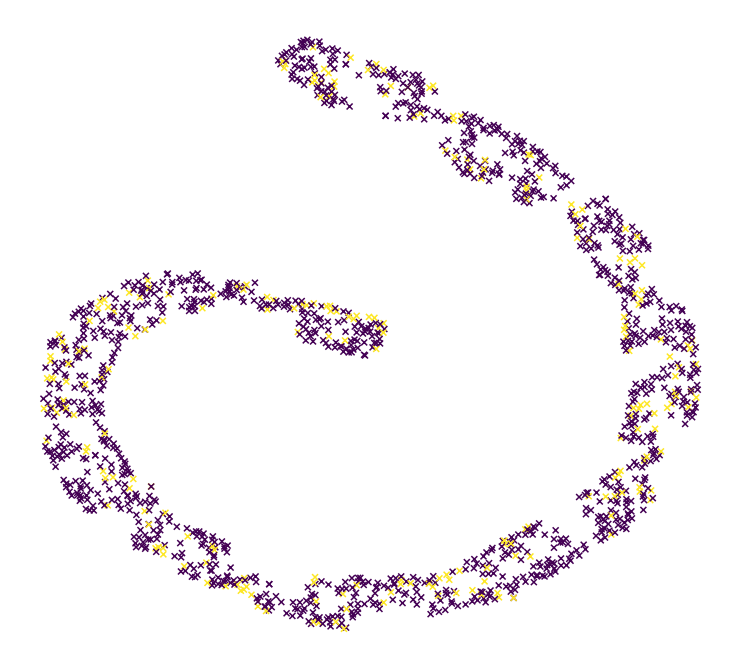

In [19]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=45, random_state=0).fit_transform(df)

X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=df.Attrition, marker="x");

## Feature importance
https://www.fabienplisson.com/choosing-right-features/

### Random Forest

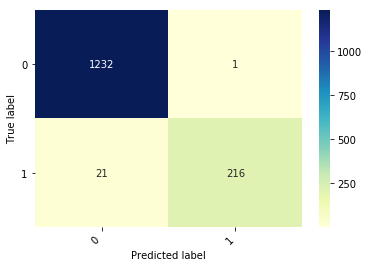

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X = df.drop(['Attrition'], axis=1)
y = df.Attrition

rfc = RandomForestClassifier()
rfc.fit(X, y)

cm = confusion_matrix(y, rfc.predict(X))

heatmap = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

importance
feature                         
TotalWorkingYears          0.062
Age                        0.054
HourlyRate                 0.052
DailyRate                  0.051
DistanceFromHome           0.048
YearsAtCompany             0.048
OverTime                   0.047
YearsWithCurrManager       0.045
MonthlyRate                0.042
PercentSalaryHike          0.039
JobInvolvement             0.038
NumCompaniesWorked         0.034
YearsInCurrentRole         0.031

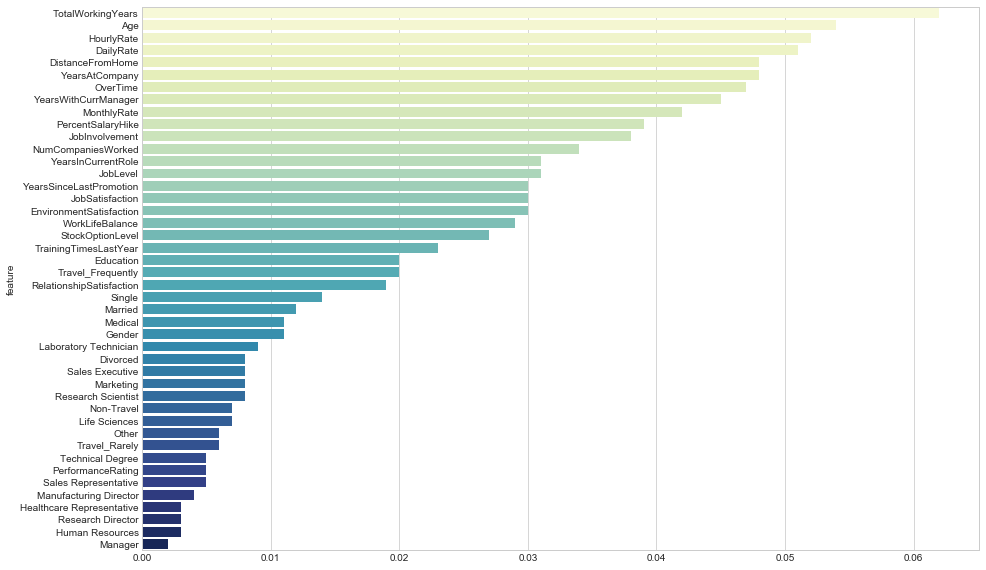

In [21]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

plt.figure(figsize=(15,10));
sns.set_style("whitegrid")
sns.barplot(importances.values.ravel(), importances.index, palette="YlGnBu")

importances.head(13)

In [22]:
#In jupyter lab might requre: jupyter labextension install @jupyterlab/plotly-extension

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Scatter plot 
trace = go.Scatter(
    y = rfc.feature_importances_,
    x = X.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rfc.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

Take first ~8 features and play with them. How about PCA?

##SelectKBest with chi2: TODO

### Save the best features

In [23]:
df[['Attrition', 'MonthlyRate', 'Age','DailyRate', 'YearsAtCompany','TotalWorkingYears', 'HourlyRate', 'DistanceFromHome', 
   'PercentSalaryHike','NumCompaniesWorked', 'YearsInCurrentRole','TrainingTimesLastYear', 'EnvironmentSatisfaction',
   'YearsWithCurrManager', 'JobSatisfaction','EnvironmentSatisfaction', 'JobInvolvement']].to_csv('after_vis.csv', index=False)